In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
titanic = sns.load_dataset('titanic')
print(titanic.shape)
titanic.head()

(891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [3]:
titanic = titanic[['survived', 'pclass', 'sex', 'age']]
titanic.dropna(axis=0, inplace=True)
titanic['sex'].replace(['male', 'female'], [0,1], inplace=True)
print(titanic.shape)
titanic.head()

(714, 4)


,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [4]:
from sklearn.neighbors import KNeighborsClassifier

In [5]:
model = KNeighborsClassifier(n_neighbors=3)

In [6]:
y = titanic['survived']
X = titanic.drop('survived', axis=1) # on procède à l'élimination de la colonne 'survived' selon l'axe 1 -> axis=1
# X = titanic[['pclass', 'sex', 'age']]

In [7]:
model.fit(X, y)
model.score(X, y) # Cela signifie que notre modèle effectue une bonne prédiction 83 % du temps

0.8585434173669467

In [8]:
def select_best_n_neighbors(X, y, model, n_neighbors):
    n_neighbors = 1
    model = KNeighborsClassifier(n_neighbors)
    model.fit(X, y)
    a = model.score(X, y)
    score = []
    score.append(a)
    for k in range(1,14):
        model = KNeighborsClassifier(n_neighbors)
        model.fit(X, y)
        a = model.score(X, y)
        model2 = KNeighborsClassifier(n_neighbors+k)
        model2.fit(X, y)
        b = model2.score(X, y)
        score.append(b)
        if a < b :
            a = b
            n_neighbors += k
    return n_neighbors, score

In [9]:
n_neighbors, score = select_best_n_neighbors(X, y, model, n_neighbors=1)

In [10]:
# print(select_best_n_neighbors(X, y, model, n_neighbors=1))

In [11]:
print(n_neighbors)

2


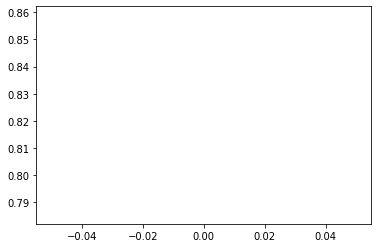

In [12]:
for i in range(13):
    plt.plot(score[i], lw=3)

In [13]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,

In [14]:
def survie(model, pclass, sex, age):
    X = np.array([pclass, sex, age]).reshape(1, 3) 
    # il faut bien rentrer ces données dans le même ordre avec lequel la machine a été entraînée
    # X doit avoir deux dimensions -> 1 ligne & 3 colonnes
    print(model.predict(X))

In [15]:
survie(model, pclass=3, sex=0, age=29)

[1]


In [16]:
def survie(model, pclass=3, sex=0, age=29):
    X = np.array([pclass, sex, age]).reshape(1, 3) 
    print(model.predict(X))
    print(model.predict_proba(X))

In [17]:
survie(model)

[1]
[[0.33333333 0.66666667]]
